## `Essential Functions`

In [18]:
import matplotlib.pyplot as plt
# _____________________________________________________________________________________________________
# Function to plot a grayscale image
def plot_image(image):
    """
    Args: image (numpy.ndarray): The input image array.
    """
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
# _____________________________________________________________________________________________________
# Function to plot a color image
def plot_color_image(image):
    """
    Args: image (numpy.ndarray): The input color image array.
    """
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
# _____________________________________________________________________________________________________
# Function to save the current figure.
import os # Importing the os module for operating system related functions
# Define the directory structure for saving figures
PROJECT_ROOT_DIR = "." # Define the project's root directory
CHAPTER_ID = "cnn" # Define the chapter ID (or directory name) for organization
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # Define the path where images will be saved by joining the project root, "images", and chapter ID
os.makedirs(IMAGES_PATH, exist_ok=True)# Create the directory specified by IMAGES_PATH if it doesn't already exist

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Args:
    1. fig_id (str): The filename (without extension) to save the figure as.
    2. tight_layout (bool, optional): Whether to apply tight layout. Default is True.
    3. fig_extension (str, optional): The file extension of the saved figure. Default is "png".
    4. resolution (int, optional): The resolution of the saved figure. Default is 300.
    """
    # Construct the full path for saving the figure
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    # Inform about the saving process
    print("Saving figure", fig_id)
    # Apply tight layout if specified
    if tight_layout:
        plt.tight_layout()
    # Save the figure with specified format and resolution
    plt.savefig(path, format=fig_extension, dpi=resolution)
# _____________________________________________________________________________________________________
# Function to crop a portion of the input images.
def crop(images):
    """
    Args: images (numpy.ndarray): The input image array.
    Returns: numpy.ndarray: The cropped portion of the input images.
    """
    return images[150:220, 130:250]

# `Convolutional Layers`

The convolutional layer is the key component of a CNN. 

* Unlike first layer, neurons in the first convolutional layer are connected only to `pixels` within their `receptive fields`, not to every pixel in the input image. Neurons in subsequent layers are connected to a `small rectangle` of neurons in the preceding layer. 

* This `hierarchical architecture` enables the network to focus on `small low-level features` initially, gradually `assembling` them into larger `higher-level features` in subsequent layers. 

* This hierarchical structure mirrors real-world images, making CNNs highly effective for image recognition.

In [19]:
'''
   Input Image         Convolutional Layer 1        Convolutional Layer 2
+-------------+           +-------------+             +-------------+
|             |           |             |             |             |
|   Neurons   |           |   Neurons   |             |   Neurons   |
|   connected |           |   connected |             |   connected |
|     to      |           |     to      |             |     to      |
|   pixels    |           |   small     |             |   small     |
|     in      |           |  rectangle  |             |  rectangle  |
| receptive   |           | in previous |             | in previous |
|   fields    |           |    layer    |             |    layer    |
|             |           |             |             |             |
+-------------+           +-------------+             +-------------+
'''

'\n   Input Image         Convolutional Layer 1        Convolutional Layer 2\n+-------------+           +-------------+             +-------------+\n|             |           |             |             |             |\n|   Neurons   |           |   Neurons   |             |   Neurons   |\n|   connected |           |   connected |             |   connected |\n|     to      |           |     to      |             |     to      |\n|   pixels    |           |   small     |             |   small     |\n|     in      |           |  rectangle  |             |  rectangle  |\n| receptive   |           | in previous |             | in previous |\n|   fields    |           |    layer    |             |    layer    |\n|             |           |             |             |             |\n+-------------+           +-------------+             +-------------+\n'

  * **Zero Padding:** A neuron positioned at row $i$, column $j$ within a specific layer receives inputs from neurons in the previous layer situated in rows $i$ to $i + f_h – 1$, and columns $j$ to $j + f_w – 1$. Here, $f$ represents the height and width of the receptive field. To maintain `consistency in layer dimensions` with the preceding layer, it's typical to append zeros around the inputs, as depicted in the diagram. This practice is commonly referred to as `zero padding`

In [20]:
'''
Neurons in Layer (i, j):        
+---+---+---+
|   |   |   |    
+---+---+---+
|   |   |   |    
+---+---+---+
|   |   |   |    
+---+---+---+

Layer (i, j) with Padding:
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
'''

'\nNeurons in Layer (i, j):        \n+---+---+---+\n|   |   |   |    \n+---+---+---+\n|   |   |   |    \n+---+---+---+\n|   |   |   |    \n+---+---+---+\n\nLayer (i, j) with Padding:\n+---+---+---+---+---+\n| 0 | 0 | 0 | 0 | 0 |\n+---+---+---+---+---+\n| 0 |   |   |   | 0 |\n+---+---+---+---+---+\n| 0 |   |   |   | 0 |\n+---+---+---+---+---+\n| 0 |   |   |   | 0 |\n+---+---+---+---+---+\n| 0 | 0 | 0 | 0 | 0 |\n+---+---+---+---+---+\n'

* **Note:** It is also possible to connect a large input layer to a much smaller layer by `spacing out` the receptive fields.

  * This dramatically reduces the model’s computational complexity. 

  * The shift from one receptive field to the next is called the **stride**. 

  * In the diagram, a $5 × 7$ `input layer` (plus zero padding) is connected to a $3 × 4$ `layer`, using 3 × 3 `receptive fields` and a `stride of 2` (in this example the **stride** is the same in both directions, but it does not have to be so). 

  * A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i × s_h$ to $i × s_h + f_h – 1$, columns $j × s_w$ to $j × s_w + f_w – 1$, where $s_w$ and $s_h$ are the vertical and horizontal strides.

In [21]:
'''
Previous Layer (5x7):
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
| | |  | | | | |
+-+-+--+-+-+-+-+
| | |  | | | | |
+-+-+--+-+-+-+-+

Upper Layer (3x4):
+-+-+-+-+-+-+
|*|#| | | | |
+-+-+-+-+-+-+
| | | | | | |
+-+-+-+-+-+-+
| | | | | | |
+-+-+-+-+-+-+
'''

'\nPrevious Layer (5x7):\n+-+-+--+-+-+-+-+\n|*|*|*#|#|#| | |\n+-+-+--+-+-+-+-+\n|*|*|*#|#|#| | |\n+-+-+--+-+-+-+-+\n|*|*|*#|#|#| | |\n+-+-+--+-+-+-+-+\n| | |  | | | | |\n+-+-+--+-+-+-+-+\n| | |  | | | | |\n+-+-+--+-+-+-+-+\n\nUpper Layer (3x4):\n+-+-+-+-+-+-+\n|*|#| | | | |\n+-+-+-+-+-+-+\n| | | | | | |\n+-+-+-+-+-+-+\n| | | | | | |\n+-+-+-+-+-+-+\n'

## Filters (Convolution Kernels): 

Each filter focuses on detecting specific patterns in the input data, such as vertical or horizontal lines. By convolving these filters over the input image, the CNN can identify important features.

  * During training, the CNN learns to adjust the weights of these filters automatically to optimize performance for the given task. As a result, the network can learn to recognize complex patterns and features in the input data, leading to more accurate predictions.

  * **Feature Extraction**: Filters are used to extract meaningful features from input data. These features represent patterns or characteristics present in the data that are relevant to the task at hand. For example, in image classification tasks, filters might detect edges, textures, shapes, or other visual patterns.

  * **Dimensionality Reduction**: By applying filters to input data, CNNs can reduce the dimensionality of the data while preserving important information. This reduction in dimensionality helps in focusing on the most relevant features, making the subsequent processing more efficient.

* **Convolution Operation**: Mathematical Explanation

  * The convolution operation is a fundamental process in image processing and forms the basis of operations in convolutional neural networks ($CNNs$). Mathematically, the convolution between a 2D input image ($ I $) and a 2D filter ( $F$ ) at a specific position can be expressed as:

    $ O(i, j) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} I(i-m, j-n) \cdot F(m, n) $

     - $O(i, j) $ represents the output value at position $(i, j)$ in the resulting feature map.
     - $M$ and $N$ are the dimensions of the filter $F$.
     - $I(i-m, j-n)$ denotes the pixel intensity of the input image at position $(i-m, j-n)$.
     - $F(m, n)$ represents the weight of the filter at position $(m, n)$.

  * This equation computes the dot product between the input image patch centered at position $(i, j)$ and the filter $ F$. It then sums up these products over all the elements of the filter to produce the output value $ O(i, j) $ at the corresponding position in the output feature map.

  * The convolution operation is applied across all positions $ (i, j) $ in the input image, resulting in a new feature map $ O $ that captures certain characteristics or features of the input image, as influenced by the filter $ F $.

  * The filter $ F $ may undergo operations such as weight sharing and bias addition during the convolution process within neural network architectures like CNNs.



* **Simple example:** where we have a grayscale image and we want to apply filters to detect horizontal and vertical edges.

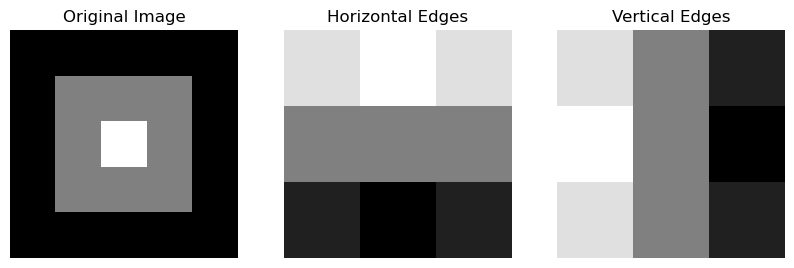

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Example grayscale image
image = np.array([[10, 10, 10, 10, 10],
                  [10, 20, 20, 20, 10],
                  [10, 20, 30, 20, 10],
                  [10, 20, 20, 20, 10],
                  [10, 10, 10, 10, 10]])

# Define horizontal and vertical edge detection filters
horizontal_filter = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])

vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])

# Convolve filters with the image
horizontal_edges = convolve2d(image, horizontal_filter, mode='valid')
vertical_edges = convolve2d(image, vertical_filter, mode='valid')

# Plot the original image and the detected edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.show()

* **Example:** 
* The initial filter is depicted as a black square containing a white vertical line at its center, essentially comprising a 7x7 matrix predominantly filled with zeros except for the central column, which is entirely occupied by ones. Neurons employing these weights will exclusively focus on the central vertical line within their receptive field, as inputs outside this line will be nullified due to multiplication by zero. 

* Similarly, the second filter resembles a black square featuring a white horizontal line at its midpoint. Neurons utilizing these weights will solely attend to the central horizontal line within their receptive field, disregarding other inputs.

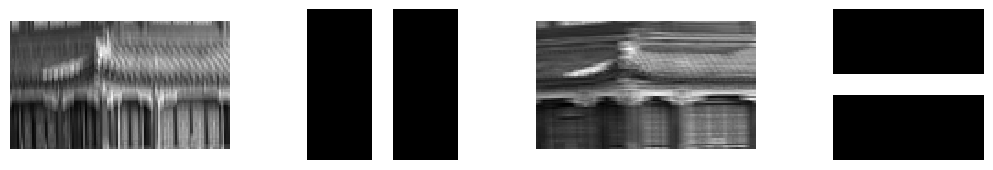

In [23]:
import numpy as np  # Importing NumPy library as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image  # Importing load_sample_image function from sklearn.datasets module

# Load sample images
''' Dividing images by 255 scales the pixel values to a range between 0 and 1. 
This normalization simplifies computation and ensures consistency across different 
datasets by standardizing pixel values, regardless of the original color depth. 
It's a common practice in image processing and machine learning to facilitate 
convergence during training and improve model performance.'''
china = load_sample_image("china.jpg") / 255  # Loading and normalizing the "china.jpg" image
flower = load_sample_image("flower.jpg") / 255  # Loading and normalizing the "flower.jpg" image
images = np.array([china, flower])  # Creating an array containing both images
''''
batch_size: This refers to the number of images in the dataset. 
height: It indicates the vertical size of the images in pixels, representing the number of rows.
width: It represents the horizontal size of the images in pixels, denoting the number of columns.
channels: It represent the image depth, indicating whether it's grayscale or colored. Grayscale images have one channel, while RGB images have three.'''
batch_size, height, width, channels = images.shape  # Retrieving dimensions of the images

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)  # Creating an array of zeros for filters with specified shape
filters[:, 3, :, 0] = 1  # Defining the first filter as a vertical line
filters[3, :, :, 1] = 1  # Defining the second filter as a horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")  # Performing convolution operation on the images using the defined filters
'''
tf.nn.conv2d: It's a TensorFlow function for 2D convolution, a core operation in CNNs where a filter is applied to an image to generate a feature map.
images: This is the input to the convolution operation. It is typically a tensor representing an image or a batch of images. 
filters: This represents the convolutional filters or kernels. These are smaller tensors applied to the input image to perform convolution. 
strides: This parameter specifies the stride of the convolution. It's an integer or a tuple of two integers, indicating the horizontal and vertical stride respectively. 
padding: This parameter controls how the convolution handles image borders. "SAME" padding ensures the output feature map matches the input image's dimensions by padding zeros around it.'''

# Create a figure with a specific size
plt.figure(figsize=(13, 9))

# Iterate over a range of values from 0 to 4 (exclusive) with a step of 2
for image_index in range(0, 4, 2):
    # Create a subplot in a 4x4 grid, index starts from 1
    plt.subplot(4, 4, image_index+1)
    # Plot the cropped image corresponding to the current index
    plot_image(crop(outputs[0, :, :, round(image_index/2)]))
    # Create another subplot in the same grid
    plt.subplot(4, 4, image_index+2)
    # Plot the filter image corresponding to the current index
    plot_image(filters[:, :, 0, round(image_index/2)])

## Stacking Multiple Feature Maps
* **Stacking Multiple Feature Maps**: Convolutional layers are indeed composed of multiple filters, each responsible for detecting different features in the input data. The **number** of **filters** in a convolutional layer is a **hyperparameter** set by the designer of the neural network.

  * During the forward pass, each filter simultaneously convolves with the input data, producing a **feature map**. These feature maps capture various patterns or features present in the input, such as edges, textures, or more complex structures, depending on the parameters of the filters and the nature of the data.

  * By having multiple filters, the convolutional layer can detect and extract diverse features simultaneously, enhancing the model's capability to learn complex representations from the input data. 

  * This parallel processing of multiple filters enables convolutional neural networks to excel in tasks such as image recognition, object detection, and semantic segmentation, among others.

* Images consist of **multiple sublayers** or **channels**, like the red, green, and blue (RGB) channels. Grayscale images have one channel, while others, like satellite images, may have more, such as infrared channels. These channels capture different aspects of the image's information.

* To visualize this description of a convolutional neural network (CNN), we need to understand how neurons in a convolutional layer are connected to neurons in the previous layer. 

  * **Neuron Position in the Current Layer (l):** We have a neuron located at position $(i, j)$ in feature map $k$ of layer $l$.
  * **Connection to Previous Layer (l-1):** This neuron in layer $l$ is connected to the outputs of neurons in the previous layer $l-1$, Specifically, it connects to neurons in rows $i × s$ to $i × s + f - 1$ and columns $j × s$ to $j × s + f - 1$, across all feature maps in layer $l-1$.
  * **Shared Connections Across Feature Maps:** Neurons in the row $i$ and column $j$ but in different feature maps (in the same layer $l$) are simultanusely connected to the outputs of the neurons located in rows $i × s$ to $i × s + f – 1$ and columns $j × s$ to $j × s + f – 1$, across all feature maps in the previous layer $l-1$.

In [24]:
'''
Layer l:

FM1                    FM2
  0   0   0   0         0   0   0   0
  0   0   0   0         0   0   0   0
  0   0  (2,2) 0  ----> 0   0  (2,2) 0
  0   0   0   0         0   0   0   0
  0   0   0   0         0   0   0   0
      |   |   |             |   |   |
      V   V   V             V   V   V
Layer l-1:

FM1                    FM2
  0   0   0   0   0         0   0   0   0   0
  0   0   0   0   0         0   0   0   0   0
  0   0  [2,2] [2,3] [2,4]  0   0  [2,2] [2,3] [2,4]
  0   0  [3,2] [3,3] [3,4]  0   0  [3,2] [3,3] [3,4]
  0   0  [4,2] [4,3] [4,4]  0   0  [4,2] [4,3] [4,4]
  0   0   0   0   0         0   0   0   0   0
'''

'\nLayer l:\n\nFM1                    FM2\n  0   0   0   0         0   0   0   0\n  0   0   0   0         0   0   0   0\n  0   0  (2,2) 0  ----> 0   0  (2,2) 0\n  0   0   0   0         0   0   0   0\n  0   0   0   0         0   0   0   0\n      |   |   |             |   |   |\n      V   V   V             V   V   V\nLayer l-1:\n\nFM1                    FM2\n  0   0   0   0   0         0   0   0   0   0\n  0   0   0   0   0         0   0   0   0   0\n  0   0  [2,2] [2,3] [2,4]  0   0  [2,2] [2,3] [2,4]\n  0   0  [3,2] [3,3] [3,4]  0   0  [3,2] [3,3] [3,4]\n  0   0  [4,2] [4,3] [4,4]  0   0  [4,2] [4,3] [4,4]\n  0   0   0   0   0         0   0   0   0   0\n'

### Equation to compute the output of a given neuron in a convolutional layer:

* It calculate the weighted sum of all the inputs, plus the bias term.

\begin{equation}
z_{i,j,k} = b_k + \sum_{u=0}^{f_h-1} \sum_{v=0}^{f_w-1} \sum_{k'=0}^{f_n'-1} x_{i',j',k'} \cdot w_{u,v,k',k}
\end{equation}

where: $ i' = i \times s_h + u $, $ j' = j \times s_w + v $

In this equation:
*  $z_{i,j,k}$ is the output of the neuron located in row $i$, column $j$ in feature map $k$ of the convolutional layer.
* $b_k$ is the bias term for feature map $k$ (in layer $l$). You can think of it as a knob that tweaks the overall brightness of the feature map $k$.
* $f_h$ and $f_w$ are the height and width of the receptive field.
* $f_n'$ is the number of feature maps in the previous layer (layer $l-1$).
*  $s_h$ and $s_w$ are the vertical and horizontal strides.
* $x_{i',j',k'}$ is the output of the neuron located in layer $l-1$, row $i'$, column $j'$, feature map $k'$ (or channel $k'$ if the previous layer is the input layer).
* $w_{u,v,k',k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron’s receptive field), and feature map $k'$.

## TensorFlow Implementation

**1. Loading Sample Images**
* In TensorFlow, each input *image* is typically represented as a *3D tensor* of shape *[height, width, channels]*. 
* A *mini-batch* is represented as a *4D tensor* of shape *[mini-batch size, height, width, channels]*. 
* The *weights* of a convolutional layer are represented as a *4D tensor* of shape *[filter height, filter width, input channels, output channels]*. The *bias* terms of a convolutional layer are simply represented as a *1D tensor* of shape *[output channels]*.

**2. Performing 2D convolution on tensors (`tf.nn.conv2d()`)**

* **Images** represent the input mini-batch, structured as a 4D tensor. 

* **Filters** denote the set of filters to apply, also organized as a 4D tensor as previously outlined. 

* **Strides** are typically set to 1, but alternatively, it could be represented by a 1D array with four elements. The two central elements signify the vertical and horizontal strides ($s_w$ and $s_h$). 

* **Padding** must be designated as either **same** or **valid**:

    * When set to **same** the convolutional layer incorporates zero padding when necessary. The output size is adjusted to the number of input neurons divided by the stride, rounded up. For instance, if the input size is 13 and the stride is 5, then the output size is 3 (i.e., 13 / 5 = 2.6, rounded up to 3). Zeros are then evenly added around the inputs as required. In cases where strides=1, the layer’s outputs maintain identical spatial dimensions (width and height) as its inputs, hence the term "same."
    
    * When using **valid** padding, the convolutional layer ignores adding any extra padding around the input image. Instead, it might skip some rows and columns at the edges of the input image, depending on the specified stride. This guarantees that each neuron's receptive field stays entirely within the valid positions inside the input, hence the term **valid**.

**3. Plotting one of the resulting feature maps**


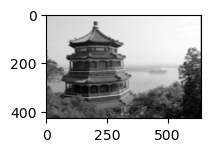

In [25]:
from sklearn.datasets import load_sample_image  # Import function to load sample images
import numpy as np  # Import NumPy library for array manipulation
import tensorflow as tf  # Import TensorFlow library for deep learning operations
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Load sample images and normalize pixel values to the range [0, 1]
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

# Combine images into a batch
images = np.array([china, flower])

# Get dimensions of the batch
batch_size, height, width, channels = images.shape

# Create 2 filters: one for detecting vertical lines and one for horizontal lines
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # Set values for vertical line filter
filters[3, :, :, 1] = 1  # Set values for horizontal line filter

# Perform convolution operation on the images with the filters
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

# Plot the 1st image's 2nd feature map
plt.figure(figsize=(2, 1.5))
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

**4. Creatign a 2D convolutional layer, using `keras.layers.Conv2D()`:**

In [26]:
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf

# Importing necessary libraries for TensorFlow and NumPy

# Setting random seeds to ensure reproducibility of results
np.random.seed(42)  # Setting seed for NumPy random number generator
tf.random.set_seed(42)  # Setting seed for TensorFlow random number generator

'''
Defining a convolutional layer

A convolution operation is applied to the input, typically used for feature extraction
Here, we're creating a 2D convolutional layer with 2 filters, a kernel size of 7x7, and ReLU activation
"strides=1" means the filter in each step, one pixel to the right (along the width) 
 and one pixel down (along the height), covering all possible positions in the input image. 
"padding='SAME'" pads the input such that the output has the same height and width as the input
"input_shape=outputs.shape" defines the shape of the input to the layer, where 'outputs' is assumed to be predefined
'''

conv = keras.layers.Conv2D(filters=2, kernel_size=7, strides=1,
                           padding="SAME", activation="relu", input_shape=outputs.shape)


## Memory Usage
- **Understanding the Layer's Configuration**
  - **Filter Size**: The layer uses filters (kernels) of size $5 \times 5$.
  - **Number of Filters**: There are 200 filters, each producing a feature map.
  - **Feature Map Size**: The output feature maps are of size $150 \times 100$.
  - **Stride and Padding**:
    - **Stride**: The stride is 1, meaning the filter moves one pixel at a time.
    - **Padding**: "Same" padding means the output feature map has the same spatial dimensions as the input.

- **Input Characteristics**
  - **Input Size**: The input is a $150 \times 100$ RGB image, which means it has three channels (Red, Green, Blue).

- **Calculating the Number of Parameters**
  - **Weights**: Each filter has a size of $5 \times 5$ and is applied to 3 channels. Thus, each filter has $5 \times 5 \times 3 = 75$ weights.
  - **Bias**: Each filter also has one bias term.

  So, the total number of parameters per filter is: $75 + 1 = 76 $. With 200 filters, the total number of parameters is: $76 \times 200 = 15,200$

- **Computational Complexity**
  - Each neuron considers a $5 \times 5 \times 3$ region from the input, totaling 75 inputs.
  - Each feature map has $150 \times 100$ neurons.

  So, the total number of multiplications for all feature maps is: $200 \times 150 \times 100 \times 75 = 225,000,000 \text{ multiplications} $

- **Memory Usage**
  - Each feature map has $150 \times 100$ neurons.
  - There are 200 feature maps.
  - If represented using 32-bit floats, each value occupies 4 bytes (since 1 byte = 8 bits, and 32 bits = 4 bytes).

  The memory required for the output of one instance is: $200 \times 150 \times 100 \times 4 \text{ bytes} = 12,000,000 \text{ bytes} = 12 \text{ MB}$. For a training batch of 100 instances: $ 12 \text{ MB} \times 100 = 1,200 \text{ MB} = 1.2 \text{ GB} $

- **Summary**
  - **Memory Usage**: The output of the layer for one instance occupies 12 MB of RAM, and for a batch of 100 instances, it occupies 1.2 GB of RAM.

- **The difference in memory requirement between inference and training**

  * During inference, memory occupied by one layer can be released once the next layer's computation is complete, requiring only enough RAM for two consecutive layers. 
  * In contrast, during training, all computations done during the forward pass must be preserved for the backward pass, necessitating enough RAM to store all intermediate values, gradients, and parameters for each layer throughout the network. 
  * This difference underscores the need to optimize memory usage during training to avoid memory constraints.

In [27]:
'''
This function helps quantify the computational and memory requirements of 
a convolutional layer in a CNN, aiding in optimizing network architecture 
and resource allocation.
'''
def calculate_memory_usage(input_shape, filter_size, num_filters, stride, padding, batch_size, data_type='float32'):
    # Unpacking input shape dimensions
    input_height, input_width, input_channels = input_shape
    
    # Unpacking filter dimensions
    filter_height, filter_width = filter_size
    
    # Data type size mapping (in bytes)
    data_type_size = {
        'float32': 4,
        'float64': 8
    }
    
    # Validate the provided data type
    if data_type not in data_type_size:
        raise ValueError("Unsupported data type. Use 'float32' or 'float64'.")
    
    # Calculate output dimensions based on padding type
    if padding == 'same':
        output_height = input_height
        output_width = input_width
    elif padding == 'valid':
        output_height = (input_height - filter_height) // stride + 1
        output_width = (input_width - filter_width) // stride + 1
    else:
        raise ValueError("Unsupported padding type. Use 'same' or 'valid'.")
    
    # Calculate the number of parameters per filter
    num_weights_per_filter = filter_height * filter_width * input_channels
    num_params_per_filter = num_weights_per_filter + 1  # Adding 1 for the bias term
    total_params = num_params_per_filter * num_filters
    
    # Calculate computational complexity
    num_multiplications_per_neuron = num_weights_per_filter
    num_neurons_per_feature_map = output_height * output_width
    total_multiplications = num_filters * num_neurons_per_feature_map * num_multiplications_per_neuron
    
    # Determine if the operation is computationally intensive
    computationally_intensive_threshold = 100_000_000  # Threshold set to 100 million multiplications
    is_computationally_intensive = total_multiplications > computationally_intensive_threshold
    
    # Calculate memory usage for the output feature maps
    output_volume = output_height * output_width * num_filters
    memory_usage_per_instance = output_volume * data_type_size[data_type]
    
    # Calculate total memory usage for the batch
    total_memory_usage = memory_usage_per_instance * batch_size
    
    # Return a dictionary with the calculated values
    return {
        'total_params': total_params,
        'total_multiplications': total_multiplications,
        'is_computationally_intensive': is_computationally_intensive,
        'memory_usage_per_instance_MB': memory_usage_per_instance / (1024 * 1024),  # Convert to MB
        'total_memory_usage_GB': total_memory_usage / (1024 * 1024 * 1024)  # Convert to GB
    }

# Example usage of the function
input_shape = (150, 100, 3)  # Input dimensions: height, width, channels
filter_size = (5, 5)         # Filter dimensions: height, width
num_filters = 200            # Number of filters
stride = 1                   # Stride length
padding = 'same'             # Padding type
batch_size = 100             # Batch size
data_type = 'float32'        # Data type of the weights and biases

# Call the function with the provided parameters
memory_usage_info = calculate_memory_usage(input_shape, filter_size, num_filters, stride, padding, batch_size, data_type)

# Print the results
print(f"Total parameters: {memory_usage_info['total_params']}")
print(f"Total multiplications: {memory_usage_info['total_multiplications']}")
print(f"Is computationally intensive: {memory_usage_info['is_computationally_intensive']}")
print(f"Memory usage per instance: {memory_usage_info['memory_usage_per_instance_MB']:.2f} MB")
print(f"Total memory usage for batch: {memory_usage_info['total_memory_usage_GB']:.2f} GB")

Total parameters: 15200
Total multiplications: 225000000
Is computationally intensive: True
Memory usage per instance: 11.44 MB
Total memory usage for batch: 1.12 GB


# `Pooling layer`

* Pooling layers in **CNNs** **reduce image size**, **cutting computational complexity**, **memory usage**, and **overfitting**.

* They **aggregate inputs** using functions like **max pooling**, which **passes** only the **maximum value** from each **receptive field** to the next layer.

* Pooling layers, unlike convolutional layers, don't have weights and rely on parameters such as size, stride, and padding to determine output dimensions.

* For example, a $2$ x $2$ max pooling kernel with a stride of 2 and no padding halves the input image's height and width.

In [28]:
'''
Input Image (4x4)               After 2x2 Max Pooling (2x2)
-----------------               ---------------------------
| 1 | 3 | 2 | 4 |               | 3 | 4 |
|---|---|---|---|               |---|---|
| 5 | 6 | 1 | 2 |     ---->     | 6 | 8 |
|---|---|---|---|
| 9 | 8 | 7 | 4 |
|---|---|---|---|
| 2 | 3 | 6 | 5 |
-----------------

Max Pooling Kernel (2x2, stride 2):
- Selects the maximum value from each 2x2 region
- No padding applied
'''

'\nInput Image (4x4)               After 2x2 Max Pooling (2x2)\n-----------------               ---------------------------\n| 1 | 3 | 2 | 4 |               | 3 | 4 |\n|---|---|---|---|               |---|---|\n| 5 | 6 | 1 | 2 |     ---->     | 6 | 8 |\n|---|---|---|---|\n| 9 | 8 | 7 | 4 |\n|---|---|---|---|\n| 2 | 3 | 6 | 5 |\n-----------------\n\nMax Pooling Kernel (2x2, stride 2):\n- Selects the maximum value from each 2x2 region\n- No padding applied\n'

### Translation Invariance

* It also play a crucial role in **enhancing** the **model's robustness** by introducing **invariance** to certain **transformations**, particularly small translations.

### Rotational and Scale Invariance

* **Rotational Invariance:** A small rotation of the input image will often still result in the maximum values being located within the same pooling windows, thus providing some resistance to changes in orientation.

* **Scale Invariance:** While max pooling is **not fully** scale-invariant, it can handle **minor** changes in scale by focusing on the most prominent features (the maximum values) within each window, regardless of slight size variations.

* By using max pooling, a CNN gains a level of translation invariance that helps in recognizing patterns even if they are slightly shifted. This property enhances the robustness of the model for tasks like image classification, where exact positioning of features is less important than their presence and relative prominence.


In [29]:
'''
Image A:

  1 |  2 |  3 |  4 |      |  6 |  8 |
  5 |  6 |  7 |  8 | ->   | 14 | 16 |
  9 | 10 | 11 | 12 |
 13 | 14 | 15 | 16 |

Image B:

  4 |  1 |  2 |  3 |     |  8 |  7 |
  8 |  5 |  6 |  7 | ->  | 16 | 15 |
 12 |  9 | 10 | 11 |
 16 | 13 | 14 | 15 |

Image C:

  3 |  4 |  1 |  2 |     |  8 |  6 |
  7 |  8 |  5 |  6 | ->  | 16 | 14 |
 11 | 12 |  9 | 10 |
 15 | 16 | 13 | 14 |
'''

'\nImage A:\n\n  1 |  2 |  3 |  4 |      |  6 |  8 |\n  5 |  6 |  7 |  8 | ->   | 14 | 16 |\n  9 | 10 | 11 | 12 |\n 13 | 14 | 15 | 16 |\n\nImage B:\n\n  4 |  1 |  2 |  3 |     |  8 |  7 |\n  8 |  5 |  6 |  7 | ->  | 16 | 15 |\n 12 |  9 | 10 | 11 |\n 16 | 13 | 14 | 15 |\n\nImage C:\n\n  3 |  4 |  1 |  2 |     |  8 |  6 |\n  7 |  8 |  5 |  6 | ->  | 16 | 14 |\n 11 | 12 |  9 | 10 |\n 15 | 16 | 13 | 14 |\n'

### **Downsides of Max Pooling**

#### **Destructive Nature:**

* Max pooling significantly reduces the size of the feature map. Specifically, with a $2$ x $2$ kernel and a stride of $2$, the output is four times smaller in area compared to the input. Essentially, $75$% of the input values are discarded, retaining only the maximum values in each $2$ x $2$ block.

#### **Loss of Detailed Information:**

* By focusing only on the maximum values, max pooling can discard important details that could be valuable for certain tasks. This can lead to a loss of spatial information that might be critical in some applications.

#### **Why Invariance is Not Always Desirable:**
* In applications like semantic segmentation, where precise pixel-level classification is required, invariance can be a disadvantage. Max pooling, by making the output less sensitive to small shifts in the input, can blur or misalign the detailed spatial information necessary for accurate pixel classification.
  * **Goal of Equivariance:** In these cases, we want the model to exhibit equivariance so that the output directly corresponds to changes in the input, preserving the spatial integrity of the features.


**Summary:** While max pooling is beneficial for reducing computations and providing some level of translation invariance, it is also quite destructive, significantly reducing the input size and potentially discarding valuable information. Additionally, in tasks like semantic segmentation, where spatial precision is crucial, the invariance property of max pooling is not desirable. Instead, we need equivariance, where outputs change in direct response to changes in inputs, ensuring accurate spatial mapping.

**Invariance:** Invariance means that the output remains largely unaffected by small changes in the input. 

**Equivariance:** Equivariance means that a small change in the input should result in a correspondingly small change in the output. This is crucial in applications where the precise location of features matters.

## TensorFlow Implementation

In [30]:
import tensorflow.keras as keras

# Create a MaxPooling layer with pool size 2x2
max_pool = keras.layers.MaxPool2D(pool_size=2)

# Create an AveragePooling layer with pool size 2x2
avg_pool = keras.layers.AvgPool2D(pool_size=2)

Saving figure china_max_pooling


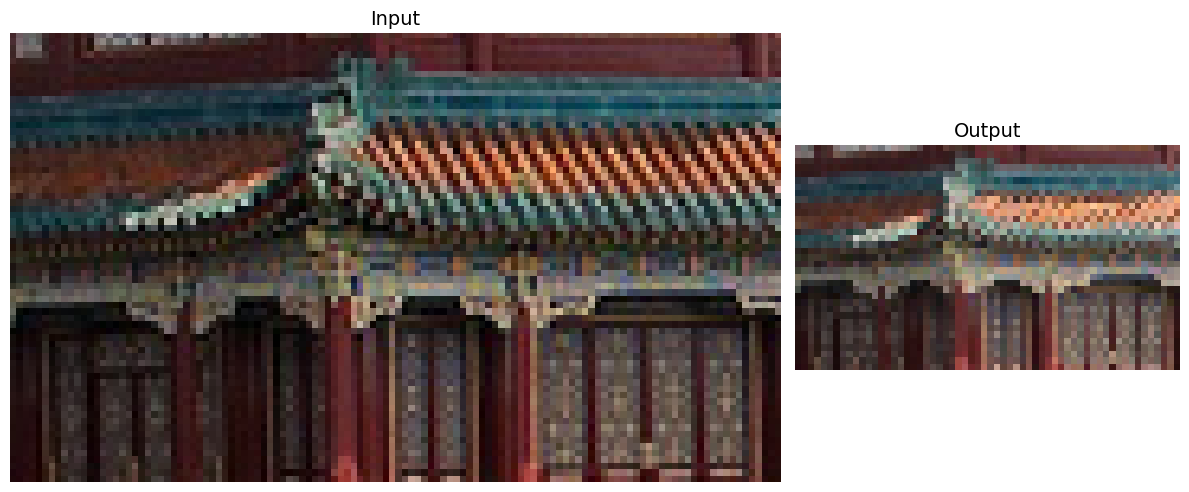

In [31]:
import matplotlib as mpl  # Import matplotlib library for plotting

# Create a MaxPooling layer with pool size 2x2
max_pool = keras.layers.MaxPool2D(pool_size=2)  
# Crop images and convert to numpy array
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
# Apply max pooling to the cropped images
output = max_pool(cropped_images) 

# Create a figure for plotting
fig = plt.figure(figsize=(12, 8)) 
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1]) # Define grid specification for subplots
ax1 = fig.add_subplot(gs[0, 0]) # Add subplot for the input image
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")

# Add subplot for the output image after max pooling
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")

# Save and display the figure
save_fig("china_max_pooling")
plt.show()
